# Data visualization with Python
## 1 - Charts turbo intro
*Cleuton Sampaio*, [**DataLearningHub**](http://datalearninghub.com)
Here you'll learn the basic part of chart generation, including: Formating and positioning using the most common types (Bar, Scatter, Pie) 


 [![](../banner_livros2.png)](https://www.lcm.com.br/site/#livros/busca?term=cleuton)

Data visualization is a very important aspect of Data Science work, and not everyone knows the most used types of graphs, in addition to the techniques and libraries used for this.

When you have mora than 2 attributes, visualization becomes impossible. In these cases, it is possible to apply techniques for [**dimensionality reduction**](https://en.wikipedia.org/wiki/Dimensionality_reduction), something that is outside the scope of this work.

## Bars, pies and lines

The most common charts in searches are these: Bars, Pies and Lines, and you can easily create them with [**Matplotlib**](https://matplotlib.org/devdocs/gallery/pie_and_polar_charts/bar_of_pie.html) .
The first thing to do is to install matplotlib:
```
pip install matplotlib
```
If you are creating your model using [**Jupyter**](https://jupyter.org/), then you have to use a [**magic command**](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to inform that the generated chart must be inserted in the **notebook**:
```
%matplotlib inline
```
Let's show a very simple example. Imagine data collected from temperatures in 3 different cities. We have lists containing temperature measurements for each city. Let's use [**Numpy**](https://numpy.org/) to create vectors and we can work with them numerically:

In [1]:
import numpy as np
%matplotlib inline 
temp_cidade1 = np.array([33.15,32.08,32.10,33.25,33.01,33.05,32.00,31.10,32.27,33.81])
temp_cidade2 = np.array([35.17,36.23,35.22,34.33,35.78,36.31,36.03,36.23,36.35,35.25])
temp_cidade3 = np.array([22.17,23.25,24.22,22.31,23.18,23.31,24.11,23.53,24.38,21.25])

Let's calculate the average temperature of each city and use it to generate a graph: 

In [2]:
medias = [np.mean(temp_cidade1), np.mean(temp_cidade2), np.mean(temp_cidade3)] # Values for the graph
nomes  = ['Cidade Um', 'Cidade Dois', 'Cidade Três'] # City names

Now, let's create a bar chart using the **pyplot** module. First, we'll show you a very simple graph:

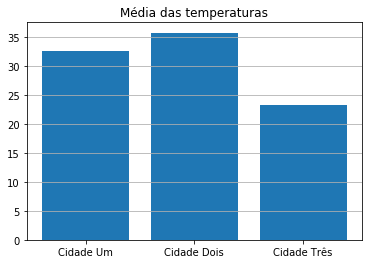

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() # Returns the graph figure and the graphics object (axes)
ax.bar([0,1,2], medias, align='center') # We create a graph passing the position of the elements
ax.set_xticks([0,1,2]) # Indicates the position of each label on the X axis
ax.set_xticklabels(nomes) # City names
ax.set_title('Média das temperaturas') # Chart title - Temperature average
ax.yaxis.grid(True) # Do we want to show a grid on the y axis?
plt.show() # Generate charts

Generating a line chart can help you understand the evolution of the data over time. We will generate line charts with the temperatures of the three cities.
To start, let's generate a line graph with a single city:

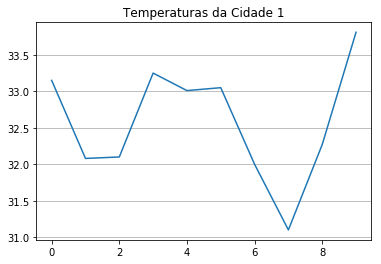

In [4]:
fig, ax = plt.subplots()
ax.plot(temp_cidade1)
ax.set_title('Temperaturas da Cidade 1') # Chart title - City 1 temperatures
ax.yaxis.grid(True)
plt.show()

It is very common to compare data variations, and we can do this by drawing the charts side by side. They can be charts of the same type or different types, and they can be in several lines and columns. For this, we build an instance of the Figure class separately, and each instance of Axes also:

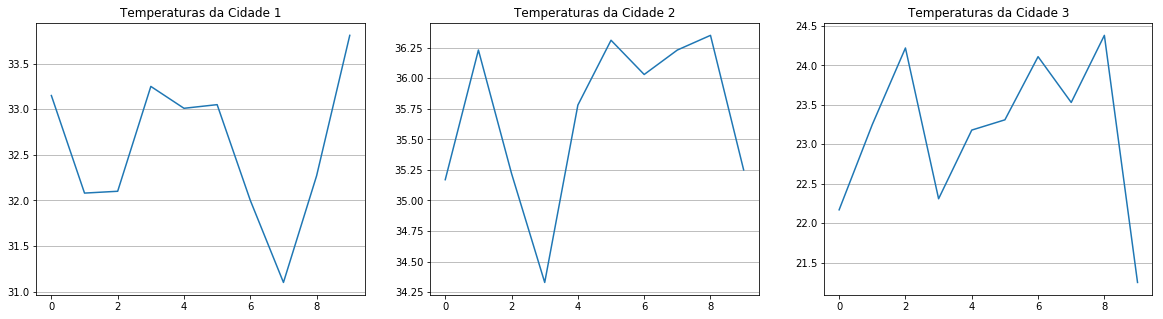

In [5]:
fig = plt.figure(figsize=(20, 5)) # witdh and height in inches
grade = fig.add_gridspec(1, 3) # We created a grid with 1 row and 3 columns (it can be with several rows too)
ax1 = fig.add_subplot(grade[0, 0]) # First row, first column
ax2 = fig.add_subplot(grade[0, 1]) # First row, second column
ax3 = fig.add_subplot(grade[0, 2]) # First row, third column
ax1.plot(temp_cidade1)
ax1.set_title('Temperaturas da Cidade 1') # Chart 1 title
ax1.yaxis.grid(True)
ax2.plot(temp_cidade2)
ax2.set_title('Temperaturas da Cidade 2') # Chart 2 title
ax2.yaxis.grid(True)
ax3.plot(temp_cidade3)
ax3.set_title('Temperaturas da Cidade 3') # Chart 3 title
ax3.yaxis.grid(True)
plt.show()

Another interesting way to compare data series is to create a chart with multiple series. Let's see how to do this:

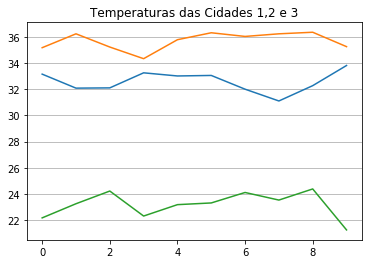

In [6]:
fig, ax = plt.subplots()
ax.plot(temp_cidade1)
ax.plot(temp_cidade2)
ax.plot(temp_cidade3)
ax.set_title('Temperaturas das Cidades 1,2 e 3') # Chart title
ax.yaxis.grid(True)
plt.show()

Here, lines of different colors were used, but we can change the legend and shape of the graphics:

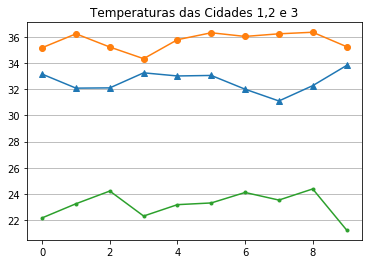

In [7]:
fig, ax = plt.subplots()
ax.plot(temp_cidade1, marker='^') # triangle markers
ax.plot(temp_cidade2, marker='o') # circle markers
ax.plot(temp_cidade3, marker='.') # dot markers
ax.set_title('Temperaturas das Cidades 1,2 e 3') # Chart title
ax.yaxis.grid(True)
plt.show()

But we can better highlight each data series:

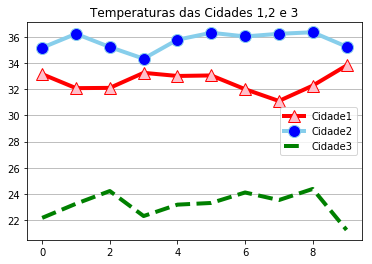

In [8]:
fig, ax = plt.subplots()
ax.plot(temp_cidade1, color="red",markerfacecolor='pink',  marker='^', linewidth=4, markersize=12, label='Cidade1')
ax.plot(temp_cidade2, color="skyblue",markerfacecolor='blue',  marker='o', linewidth=4, markersize=12, label='Cidade2')
ax.plot(temp_cidade3, color="green", linewidth=4, linestyle='dashed', label='Cidade3')
ax.set_title('Temperaturas das Cidades 1,2 e 3') # Chart title
ax.yaxis.grid(True)
plt.legend()
plt.show()

The properties below can be used to differentiate the lines:
- color: Thread color
- marker: Type of marker
- markerfacecolor: Marker fill color
- linewidth: Line width
- markersize: Marker size
- label: Data series label
- linestyle: Data line style

And we have the "legend ()" method that creates the legend of the graph

But generally, when we are creating a model, we use data frames [**Pandas**](https://pandas.pydata.org/), with several attributes. Can you generate graphs directly from them? Yes of course. We will see a simple example.
First, let's import the pandas and then read two CSV datasets (The datasets are at: https://github.com/cleuton/datascience/tree/master/datasets

In [9]:
import pandas as pd
dolar = pd.read_csv('../datasets/dolar.csv') # Dolar value in Reais (Brasilian currency)
desemprego = pd.read_csv('../datasets/desemprego.csv') # Unenployment

In [10]:
dolar.head()

Periodo   Dolar
0  2007.08  1.9652
1  2007.09  1.8988
2  2007.10  1.8002
3  2007.11  1.7691
4  2007.12  1.7852

Vamos analisar esse dataframe:

In [11]:
dolar.describe()

Periodo        Dolar
count   121.000000   121.000000
mean   2012.189091    96.254918
std       2.943821   415.140965
min    2007.080000     1.563100
25%    2010.020000     1.789014
50%    2012.080000     2.188057
75%    2015.020000     3.135572
max    2017.080000  2313.000000

There's something wrong! Some values are way above 1,000. It must be a dataset error. Let's get this right:
    

In [12]:
dolar.loc[dolar.Dolar > 1000, ['Dolar']] = dolar['Dolar'] / 1000

In [13]:
desemprego.head()

Periodo  Desemprego
0  2007.08        10.4
1  2007.09        10.5
2  2007.10        10.0
3  2007.11        10.0
4  2007.12         9.3

We can build line charts of each one using the plot, but in fact any type of chart can be generated with data frames.

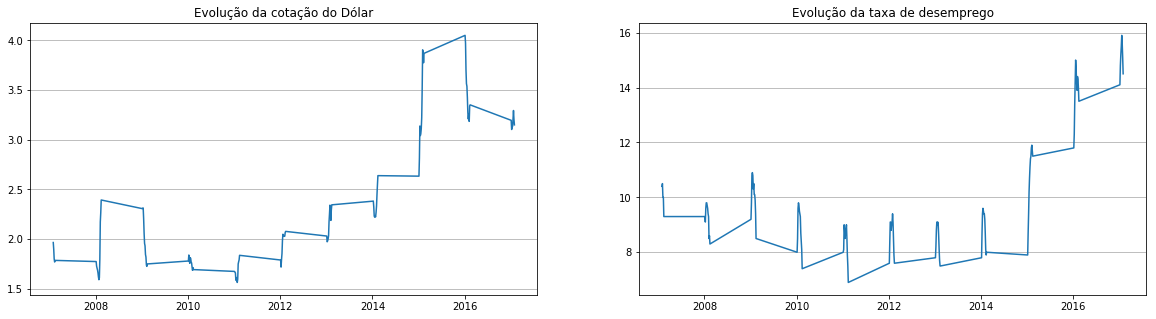

In [14]:
fig = plt.figure(figsize=(20, 5)) # Width and height in inches
grade = fig.add_gridspec(1, 2) # We created a grid with 1 row and 3 columns (it can be with several rows too)
ax1 = fig.add_subplot(grade[0, 0]) # First row, first column
ax2 = fig.add_subplot(grade[0, 1]) # First row, second column
ax1.plot(dolar['Periodo'],dolar['Dolar']) # We plot the dollar value by period
ax1.set_title('Evolução da cotação do Dólar') 
ax1.yaxis.grid(True)
ax2.plot(desemprego['Periodo'],desemprego['Desemprego'])
ax2.set_title('Evolução da taxa de desemprego') # Evolution of the unemployment rate by period
ax2.yaxis.grid(True)

Yes ... One of the great advantages of visualization, even simple, is that we see a positive correlation between the value of the dollar and unemployment. But be careful not to take this as a cause and effect relationship! There are other factors that influence both! To illustrate this, and show how to create scatter plots, let's plot a graph with the dollar on the X axis and unemployment on the Y:

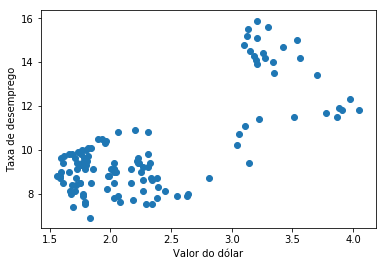

In [15]:
fig, ax = plt.subplots()
ax.scatter(dolar['Dolar'],desemprego['Desemprego'])
ax.set_xlabel("Valor do dólar")
ax.set_ylabel("Taxa de desemprego")
plt.show()

We can see that there is even some apparent correlation, but at some point, after the value of R$ 3.00, the unemployment rate jumped. This proves that the model lacks explanatory variables.

To end this lesson, let's look at how to generate pie charts. To begin, let's "invent" a monthly product sales data frame:

In [16]:
df_vendas = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

In [17]:
df_vendas.head()

A   B   C   D
0  34  75  72  58
1   7  34  85  51
2  62  90  50  82
3  61  70  29  98
4  17  96  91  19

Well, imagine that each column represents the sales of one of the products, and each line is a day. We will generate a pie chart with sales.

In [18]:
list(df_vendas.columns)

['A', 'B', 'C', 'D']

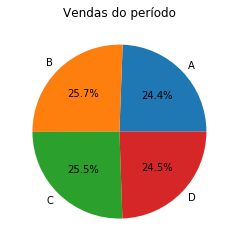

In [19]:
fig, ax = plt.subplots()
totais = df_vendas.sum()
ax.pie(totais, labels=list(df_vendas.columns),autopct='%1.1f%%')
ax.set_title('Vendas do período') 
plt.show()

And we can "explode" one or more pieces. For example, let's separate the larger piece, from product "C":

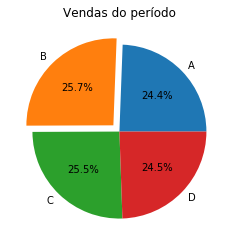

In [20]:
listexplode = [0]*len(totais) # we created a list containing zeros: One for each slice of the pizza
imax = totais.idxmax() # We take the index of the product with the highest amount of sales
ix = list(df_vendas.columns).index(imax) # Now, we turn this index into the list position
listexplode[ix]=0.1 # We modified the highlight specification of the slice with the highest value
fig, ax = plt.subplots()
ax.pie(totais, labels=list(df_vendas.columns),autopct='%1.1f%%', explode=listexplode)
ax.set_title('Vendas do período') 
plt.show()

Here we use some interesting functions. As "totais" is a series (pandas.Series) we can obtain the index of the column with the highest value with the function "ixmax ()". Only it will return the column index, which is the product name. We need the position (from zero to size-1). Then I do a "trick" with the list of columns of the original dataframe, taking the position of the product. Then, just modify the list "listexplode" stating how much we want to highlight that particular slice (the others are zero).